In [6]:
# Install required packages (skip if already available)
!pip install pandas numpy scikit-learn matplotlib seaborn

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option("display.max_columns", 120)


In [7]:
RAW_URL = "https://raw.githubusercontent.com/MAYURA26-bot/Lachesis-CHOP/main/Final_combined_dataset.csv"
df = pd.read_csv(RAW_URL)

print("Rows, Cols:", df.shape)
df.head(10)   # <-- Take screenshot of this output


Rows, Cols: (3213, 24)


,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,smoke,ch2o,scc,faf,tue,gender_Male,caec_Always,caec_Frequently,caec_Sometimes,calc_Frequently,calc_Sometimes,calc_no,mtrans_Bike,mtrans_Motorbike,mtrans_Public_Transportation,mtrans_Walking,nobeyesdad
0,17.0,1.65,67.0,1,1,3.0,1.0,0,2.0,0,1.0,1.0,False,False,False,True,False,False,True,False,False,False,True,1
1,18.0,1.56,51.0,1,1,2.0,4.0,0,2.0,0,1.0,0.0,False,False,True,False,False,True,False,False,False,True,False,1
2,17.0,1.75,57.0,1,1,3.0,3.0,0,2.0,0,0.0,1.0,False,False,True,False,False,False,True,False,False,True,False,1
3,15.0,1.65,86.0,1,1,3.0,3.0,0,1.0,0,3.0,2.0,False,False,False,True,False,False,True,False,False,False,True,2
4,17.0,1.70,85.0,1,0,2.0,3.0,0,2.0,0,1.0,1.0,False,False,True,False,False,False,True,False,False,True,False,6
5,18.0,1.75,80.0,1,1,2.0,3.0,0,2.0,0,0.0,0.0,True,True,False,False,True,False,False,False,False,True,False,5
6,18.0,1.60,58.0,1,1,2.0,3.0,0,2.0,0,1.0,0.0,True,False,True,False,False,True,False,False,False,True,False,1
7,18.0,1.74,64.0,0,0,3.0,3.0,0,2.0,1,0.0,1.0,True,False,False,True,False,False,True,False,False,True,False,1
8,18.0,1.57,48.0,1,1,3.0,1.0,0,1.0,0,1.0,0.0,False,True,False,False,False,False,True,False,False,True,False,1
9,18.0,1.58,48.0,0,1,2.0,3.0,0,2.0,0,1.0,0.0,False,False,False,True,False,False,True,False,False,True,False,1


In [8]:
# Structure of dataset
df.info()

# Quick summary statistics
df.describe(include="all").T.head(20)  # shows first 20 rows of summary

# Missing values (%)
df.isna().mean().sort_values(ascending=False).head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3213 entries, 0 to 3212
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             3213 non-null   float64
 1   height                          3213 non-null   float64
 2   weight                          3213 non-null   float64
 3   family_history_with_overweight  3213 non-null   int64  
 4   favc                            3213 non-null   int64  
 5   fcvc                            3213 non-null   float64
 6   ncp                             3213 non-null   float64
 7   smoke                           3213 non-null   int64  
 8   ch2o                            3213 non-null   float64
 9   scc                             3213 non-null   int64  
 10  faf                             3213 non-null   float64
 11  tue                             3213 non-null   float64
 12  gender_Male                     32

,0
age,0.0
height,0.0
weight,0.0
family_history_with_overweight,0.0
favc,0.0
fcvc,0.0
ncp,0.0
smoke,0.0
ch2o,0.0
scc,0.0


In [9]:
direct_ids = {"name","full_name","first_name","last_name","email","phone","mobile","address","dob","date_of_birth","studentid","id"}
quasi_ids  = {"age","postcode","postal_code","zip","suburb","school","class","gps","lat","lon","latitude","longitude","lga","sa2"}
sensitive  = {"gender","sex","height","weight","bmi","heartrate","heart_rate","diagnosis","condition","sleep","screen_time","diet","activity","steps","calories","bp","blood_pressure"}

lower_map = {c.lower(): c for c in df.columns}
present = {
    "Direct identifiers": [lower_map[c] for c in lower_map if c in direct_ids],
    "Quasi-identifiers":  [lower_map[c] for c in lower_map if c in quasi_ids],
    "Sensitive fields":   [lower_map[c] for c in lower_map if c in sensitive],
}
present


{'Direct identifiers': [],
 'Quasi-identifiers': ['age'],
 'Sensitive fields': ['height', 'weight']}

In [10]:
import pandas as pd

rows = []
for k, cols in present.items():
    rows.append({"Category": k, "Columns found": ", ".join(cols) if cols else "(none)"})
audit_df = pd.DataFrame(rows)
audit_df.to_csv("legality_ethics_audit_findings.csv", index=False)
audit_df


,Category,Columns found
0,Direct identifiers,(none)
1,Quasi-identifiers,age
2,Sensitive fields,"height, weight"


In [11]:
df_demo = df.copy()

# Drop direct identifiers if present (not in this dataset, but just in case)
for cand in ["Name","Email","Address","Phone"]:
    if cand in df_demo.columns:
        df_demo = df_demo.drop(columns=[cand])

# Example anonymization: bucket Age into groups
if "Age" in df_demo.columns:
    df_demo["Age_Group"] = pd.cut(df_demo["Age"], bins=[0,5,12,18], labels=["0-5","6-12","13-18"])

# Example: replace Weight with category
if "Weight" in df_demo.columns:
    df_demo["Weight_Category"] = pd.qcut(df_demo["Weight"], 4, labels=["Low","Medium","High","Very High"])

df_demo.head(10)


,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,smoke,ch2o,scc,faf,tue,gender_Male,caec_Always,caec_Frequently,caec_Sometimes,calc_Frequently,calc_Sometimes,calc_no,mtrans_Bike,mtrans_Motorbike,mtrans_Public_Transportation,mtrans_Walking,nobeyesdad
0,17.0,1.65,67.0,1,1,3.0,1.0,0,2.0,0,1.0,1.0,False,False,False,True,False,False,True,False,False,False,True,1
1,18.0,1.56,51.0,1,1,2.0,4.0,0,2.0,0,1.0,0.0,False,False,True,False,False,True,False,False,False,True,False,1
2,17.0,1.75,57.0,1,1,3.0,3.0,0,2.0,0,0.0,1.0,False,False,True,False,False,False,True,False,False,True,False,1
3,15.0,1.65,86.0,1,1,3.0,3.0,0,1.0,0,3.0,2.0,False,False,False,True,False,False,True,False,False,False,True,2
4,17.0,1.70,85.0,1,0,2.0,3.0,0,2.0,0,1.0,1.0,False,False,True,False,False,False,True,False,False,True,False,6
5,18.0,1.75,80.0,1,1,2.0,3.0,0,2.0,0,0.0,0.0,True,True,False,False,True,False,False,False,False,True,False,5
6,18.0,1.60,58.0,1,1,2.0,3.0,0,2.0,0,1.0,0.0,True,False,True,False,False,True,False,False,False,True,False,1
7,18.0,1.74,64.0,0,0,3.0,3.0,0,2.0,1,0.0,1.0,True,False,False,True,False,False,True,False,False,True,False,1
8,18.0,1.57,48.0,1,1,3.0,1.0,0,1.0,0,1.0,0.0,False,True,False,False,False,False,True,False,False,True,False,1
9,18.0,1.58,48.0,0,1,2.0,3.0,0,2.0,0,1.0,0.0,False,False,False,True,False,False,True,False,False,True,False,1


In [12]:
# 1) Inspect columns
print("Total columns:", len(df.columns))
print(list(df.columns)[:60])  # first 60 names

# 2) Heuristics to find target candidates
name_hits = [c for c in df.columns
             if any(k in c.lower() for k in ["obesity", "nobeyesdad", "label", "class", "target"])]

print("\nName-based candidates:", name_hits)

# 3) Check if there are one-hot label columns (e.g., NObeyesdad_* )
ohe_label_prefixes = []
for c in df.columns:
    cl = c.lower()
    if cl.startswith("nobeyesdad") or cl.startswith("obesity_") or cl.startswith("obesitylevel"):
        ohe_label_prefixes.append(c.split("_")[0])  # crude prefix guess

print("Possible one-hot label prefixes:", sorted(set(ohe_label_prefixes)))

# 4) Show nunique for first 40 columns (small-unique columns could be labels)
print("\nNunique (first 40 cols):")
for c in list(df.columns)[:40]:
    try:
        print(f"{c:35s} -> {df[c].nunique()}")
    except Exception:
        pass


Total columns: 24
['age', 'height', 'weight', 'family_history_with_overweight', 'favc', 'fcvc', 'ncp', 'smoke', 'ch2o', 'scc', 'faf', 'tue', 'gender_Male', 'caec_Always', 'caec_Frequently', 'caec_Sometimes', 'calc_Frequently', 'calc_Sometimes', 'calc_no', 'mtrans_Bike', 'mtrans_Motorbike', 'mtrans_Public_Transportation', 'mtrans_Walking', 'nobeyesdad']

Name-based candidates: ['nobeyesdad']
Possible one-hot label prefixes: ['nobeyesdad']

Nunique (first 40 cols):
age                                 -> 98
height                              -> 622
weight                              -> 436
family_history_with_overweight      -> 2
favc                                -> 2
fcvc                                -> 337
ncp                                 -> 252
smoke                               -> 2
ch2o                                -> 383
scc                                 -> 2
faf                                 -> 353
tue                                 -> 415
gender_Male              

In [13]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# ✅ Target column confirmed
TARGET = "nobeyesdad"

X = df.drop(columns=[TARGET])
y = df[TARGET]

# Split numeric vs categorical
num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

pre = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

clf = RandomForestClassifier(n_estimators=400, random_state=42, n_jobs=-1)
pipe = Pipeline(steps=[("prep", pre), ("model", clf)])

# Train/test split + cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="accuracy", n_jobs=-1)
print(f"CV Accuracy (mean ± std): {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# Fit + evaluate
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


CV Accuracy (mean ± std): 0.843 ± 0.012
Test Accuracy: 0.854

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       221
           1       0.81      0.89      0.85       193
           2       0.94      0.94      0.94        94
           3       0.00      0.00      0.00         1
           5       0.65      0.47      0.55        64
           6       0.76      0.79      0.77        70

    accuracy                           0.85       643
   macro avg       0.68      0.67      0.67       643
weighted avg       0.85      0.85      0.85       643


Confusion Matrix:
 [[205  16   0   0   0   0]
 [ 11 171   0   0   8   3]
 [  1   0  88   0   0   5]
 [  0   0   1   0   0   0]
 [  2  22   1   0  30   9]
 [  1   2   4   0   8  55]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=[TARGET])
y = df[TARGET]

num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

pre = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

clf = RandomForestClassifier(n_estimators=400, random_state=42, n_jobs=-1)
pipe = Pipeline(steps=[("prep", pre), ("model", clf)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="accuracy", n_jobs=-1)
print(f"CV Accuracy (mean ± std): {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


CV Accuracy (mean ± std): 0.843 ± 0.012
Test Accuracy: 0.854

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       221
           1       0.81      0.89      0.85       193
           2       0.94      0.94      0.94        94
           3       0.00      0.00      0.00         1
           5       0.65      0.47      0.55        64
           6       0.76      0.79      0.77        70

    accuracy                           0.85       643
   macro avg       0.68      0.67      0.67       643
weighted avg       0.85      0.85      0.85       643


Confusion Matrix:
 [[205  16   0   0   0   0]
 [ 11 171   0   0   8   3]
 [  1   0  88   0   0   5]
 [  0   0   1   0   0   0]
 [  2  22   1   0  30   9]
 [  1   2   4   0   8  55]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 0.854

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       221
           1       0.81      0.89      0.85       193
           2       0.94      0.94      0.94        94
           3       0.00      0.00      0.00         1
           5       0.65      0.47      0.55        64
           6       0.76      0.79      0.77        70

    accuracy                           0.85       643
   macro avg       0.68      0.67      0.67       643
weighted avg       0.85      0.85      0.85       643



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


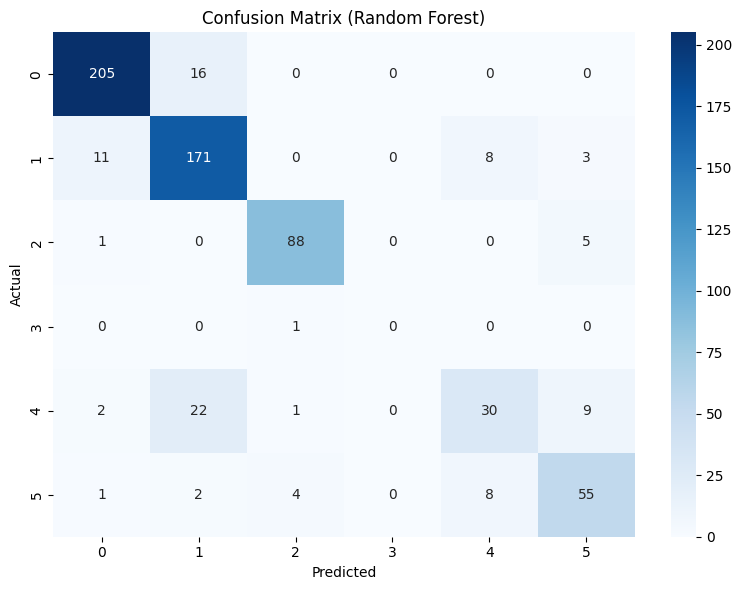

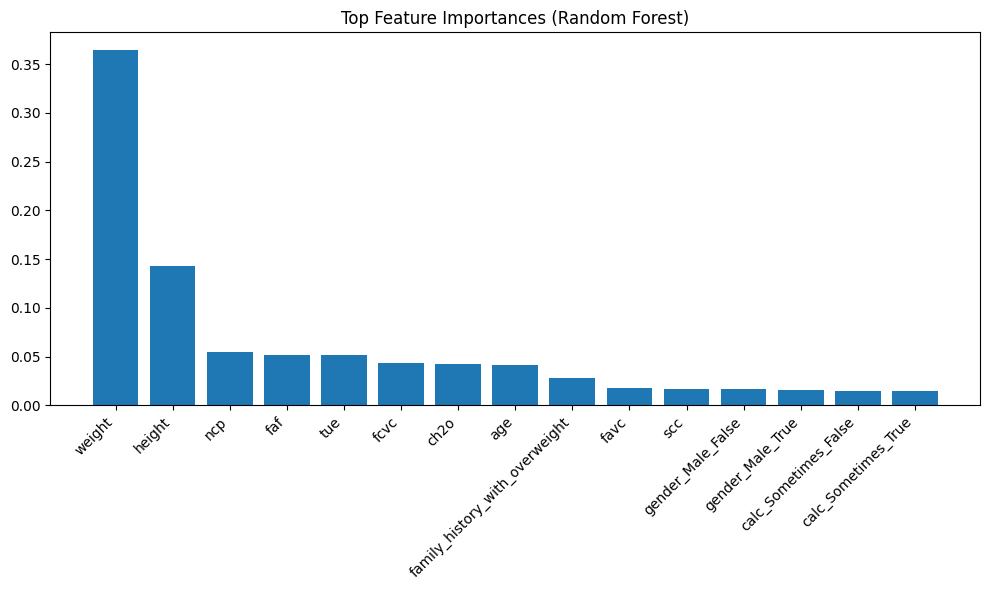

In [15]:
# --- FULL SAFE CELL: rebuild model, then plot CM + Feature Importances ---

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1) Data & target
TARGET = "nobeyesdad"
X = df.drop(columns=[TARGET])
y = df[TARGET]

# 2) Preprocessing (num passthrough, cat one-hot)
num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

pre = ColumnTransformer([
    ("num", "passthrough", num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
])

# 3) Model (inside a pipeline)
rf = RandomForestClassifier(n_estimators=400, random_state=42, n_jobs=-1)
pipe = Pipeline([("prep", pre), ("model", rf)])

# 4) Train/test split + fit + predict
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# (optional) quick metrics in text
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 5) Confusion Matrix Heatmap
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 6) Feature Importances (from the RF inside the pipeline)
rf_fitted = pipe.named_steps["model"]              # get the RF from the pipeline
importances = rf_fitted.feature_importances_
# After one-hot, feature names expand; get names from the transformer:
# Build the feature names that the model sees
cat_feature_names = list(pipe.named_steps["prep"]
                         .named_transformers_["cat"]
                         .get_feature_names_out(cat_cols))
feature_names = num_cols + cat_feature_names

# Sort and plot top 15
indices = np.argsort(importances)[::-1]
top_k = min(15, len(feature_names))
plt.figure(figsize=(10,6))
plt.bar(range(top_k), importances[indices[:top_k]], align="center")
plt.xticks(range(top_k), [feature_names[i] for i in indices[:top_k]], rotation=45, ha="right")
plt.title("Top Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


In [16]:
print(df.shape)


(3213, 24)


In [1]:
!pip install xgboost scikit-learn pandas matplotlib


In [6]:
from google.colab import drive
drive.mount('/content/drive')
CSV_PATH = "/content/drive/MyDrive/Capstone/Final_combined_dataset.csv"


Mounted at /content/drive


In [10]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import os

target_name = "Final_combined_dataset.csv"   # change if your file name differs
found = []
for root, dirs, files in os.walk("/content/drive/MyDrive"):
    if target_name in files:
        found.append(os.path.join(root, target_name))

print("Found paths:")
for p in found:
    print(" -", p)

# Use the first match:
CSV_PATH = found[0] if found else None
print("CSV_PATH =", CSV_PATH)


Found paths:
 - /content/drive/MyDrive/Final_combined_dataset.csv
CSV_PATH = /content/drive/MyDrive/Final_combined_dataset.csv


In [12]:
import pandas as pd
df = pd.read_csv(CSV_PATH)
df.head()


,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,smoke,ch2o,scc,...,caec_Frequently,caec_Sometimes,calc_Frequently,calc_Sometimes,calc_no,mtrans_Bike,mtrans_Motorbike,mtrans_Public_Transportation,mtrans_Walking,nobeyesdad
0,17.0,1.65,67.0,1,1,3.0,1.0,0,2.0,0,...,False,True,False,False,True,False,False,False,True,1
1,18.0,1.56,51.0,1,1,2.0,4.0,0,2.0,0,...,True,False,False,True,False,False,False,True,False,1
2,17.0,1.75,57.0,1,1,3.0,3.0,0,2.0,0,...,True,False,False,False,True,False,False,True,False,1
3,15.0,1.65,86.0,1,1,3.0,3.0,0,1.0,0,...,False,True,False,False,True,False,False,False,True,2
4,17.0,1.70,85.0,1,0,2.0,3.0,0,2.0,0,...,True,False,False,False,True,False,False,True,False,6


In [15]:
!pip install -q xgboost scikit-learn pandas matplotlib


In [16]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# OPTION A: set the exact path (recommended)
CSV_PATH = "/content/drive/MyDrive/Final_combined_dataset.csv"  # <-- adjust if needed

# OPTION B: search MyDrive for the file name
if CSV_PATH is None or CSV_PATH.strip() == "":
    import os
    target_name = "Final_combined_dataset.csv"   # change if your file name differs
    found = []
    for root, dirs, files in os.walk("/content/drive/MyDrive"):
        if target_name in files:
            found.append(os.path.join(root, target_name))
    print("Found paths:")
    for p in found: print(" -", p)
    CSV_PATH = found[0] if found else None

print("CSV_PATH =", CSV_PATH)


CSV_PATH = /content/drive/MyDrive/Final_combined_dataset.csv


In [18]:
import pandas as pd

assert CSV_PATH is not None, "CSV_PATH is not set. Edit the path above or use the search."

df = pd.read_csv(CSV_PATH)

# Normalize column names: strip spaces and make lower-case for consistency
df.columns = [c.strip().lower() for c in df.columns]

print(df.shape)
df.head()


(3213, 24)


,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,smoke,ch2o,scc,...,caec_frequently,caec_sometimes,calc_frequently,calc_sometimes,calc_no,mtrans_bike,mtrans_motorbike,mtrans_public_transportation,mtrans_walking,nobeyesdad
0,17.0,1.65,67.0,1,1,3.0,1.0,0,2.0,0,...,False,True,False,False,True,False,False,False,True,1
1,18.0,1.56,51.0,1,1,2.0,4.0,0,2.0,0,...,True,False,False,True,False,False,False,True,False,1
2,17.0,1.75,57.0,1,1,3.0,3.0,0,2.0,0,...,True,False,False,False,True,False,False,True,False,1
3,15.0,1.65,86.0,1,1,3.0,3.0,0,1.0,0,...,False,True,False,False,True,False,False,False,True,2
4,17.0,1.70,85.0,1,0,2.0,3.0,0,2.0,0,...,True,False,False,False,True,False,False,True,False,6


In [19]:
import numpy as np
from pathlib import Path

# ---- CONFIG ----
TARGET_COL      = "nobeyesdad"   # label with 7 classes in this dataset
HEIGHT_CM_COL   = "height"
WEIGHT_KG_COL   = "weight"
AGE_COL         = "age"
RANDOM_SEED     = 42
OUT_DIR = Path("/content/week9_xgb_outputs"); OUT_DIR.mkdir(exist_ok=True)
# ----------------

# Safety checks (will warn instead of crash)
for c in [TARGET_COL, HEIGHT_CM_COL, WEIGHT_KG_COL, AGE_COL]:
    if c not in df.columns:
        print(f"⚠️  Column '{c}' not found in df.columns")

# --- Privacy: age bands (if age exists)
if AGE_COL in df.columns:
    df["ageband"] = pd.cut(
        df[AGE_COL],
        bins=[0, 18, 25, 35, 45, 60, 200],
        labels=["0-18","19-25","26-35","36-45","46-60","60+"]
    )

# --- BMI feature (if height & weight exist and 'bmi' not already present)
if HEIGHT_CM_COL in df.columns and WEIGHT_KG_COL in df.columns and "bmi" not in df.columns:
    height_m = df[HEIGHT_CM_COL] / 100.0
    with np.errstate(divide='ignore', invalid='ignore'):
        df["bmi"] = df[WEIGHT_KG_COL] / (height_m ** 2)

print("Added features:", [c for c in ["ageband","bmi"] if c in df.columns])


Added features: ['ageband', 'bmi']


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Ensure target exists
assert TARGET_COL in df.columns, f"Target column '{TARGET_COL}' not found. Actual: {df.columns.tolist()}"

# Convert boolean columns to integers so SimpleImputer accepts them
bool_cols_in_df = df.select_dtypes(include=["bool"]).columns.tolist()
for col in bool_cols_in_df:
    df[col] = df[col].astype(int)

# Split X/y
y_raw = df[TARGET_COL].astype(str)
X = df.drop(columns=[TARGET_COL])

# Separate numeric/categorical
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = [c for c in X.columns if c not in numeric_cols]

# Impute numeric & categorical separately
num_imp = SimpleImputer(strategy="median")
cat_imp = SimpleImputer(strategy="most_frequent")

X_num = (pd.DataFrame(num_imp.fit_transform(X[numeric_cols]),
                      columns=numeric_cols, index=X.index)
         if numeric_cols else pd.DataFrame(index=X.index))

X_cat = (pd.DataFrame(cat_imp.fit_transform(X[categorical_cols]),
                      columns=categorical_cols, index=X.index)
         if categorical_cols else pd.DataFrame(index=X.index))

# One-hot encode categoricals
X_pre = pd.get_dummies(pd.concat([X_num, X_cat], axis=1), drop_first=False)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_pre, y_raw, test_size=0.2, stratify=y_raw, random_state=RANDOM_SEED
)

X_pre.shape, X_train.shape, X_test.shape


((3213, 25), (2570, 25), (643, 25))

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Encode labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)
num_classes = len(le.classes_)
pd.Series(le.classes_).to_csv(OUT_DIR / "label_classes.csv", index=False, header=["class_names"])

# Model
xgb = XGBClassifier(
    n_estimators=400, learning_rate=0.05, max_depth=6,
    subsample=0.9, colsample_bytree=0.9,
    objective="multi:softprob", num_class=num_classes,
    reg_lambda=1.0, random_state=RANDOM_SEED,
    tree_method="hist", eval_metric="mlogloss"
)

# 5-fold CV on train
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
cv_scores = cross_val_score(xgb, X_train, y_train_enc, scoring="accuracy", cv=cv, n_jobs=-1)
pd.Series(cv_scores, name="cv_accuracy").to_csv(OUT_DIR / "cv_scores.csv", index=False)

# Fit & evaluate
xgb.fit(X_train, y_train_enc)
y_pred = xgb.predict(X_test)
acc = accuracy_score(y_test_enc, y_pred)

# Classification report
report = classification_report(
    y_test_enc, y_pred,
    labels=np.arange(len(le.classes_)),   # force all classes
    target_names=le.classes_,
    output_dict=True,
    zero_division=0   # avoids divide by zero warnings
)

pd.DataFrame(report).transpose().to_csv(OUT_DIR / "classification_report.csv")

# Confusion matrix + plot
cm = confusion_matrix(y_test_enc, y_pred)
np.savetxt(OUT_DIR / "confusion_matrix.csv", cm, delimiter=",", fmt="%d")

plt.figure(figsize=(7,6))
plt.imshow(cm, interpolation="nearest")
plt.title("XGBoost Confusion Matrix (Week 9)")
plt.xlabel("Predicted"); plt.ylabel("True"); plt.colorbar()
plt.xticks(ticks=np.arange(num_classes), labels=le.classes_, rotation=45, ha="right")
plt.yticks(ticks=np.arange(num_classes), labels=le.classes_)
plt.tight_layout(); plt.savefig(OUT_DIR / "confusion_matrix.png", dpi=160); plt.close()

# Feature importances
fi = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fi.to_csv(OUT_DIR / "feature_importances.csv")
topk = min(20, len(fi))
plt.figure(figsize=(8,6))
fi.head(topk).iloc[::-1].plot(kind="barh")
plt.title("Top Feature Importances (XGBoost)")
plt.tight_layout(); plt.savefig(OUT_DIR / "feature_importances_top.png", dpi=160); plt.close()

# Summary metrics
summary = {
    "test_accuracy": round(acc, 4),
    "cv_mean_accuracy": round(cv_scores.mean(), 4),
    "cv_std": round(cv_scores.std(), 4),
    "num_features": int(X_train.shape[1]),
    "num_classes": int(num_classes),
}
pd.Series(summary).to_csv(OUT_DIR / "summary_metrics.csv")
print("✅ Done. Artifacts in:", OUT_DIR)
print(summary)


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


✅ Done. Artifacts in: /content/week9_xgb_outputs
{'test_accuracy': 0.8585, 'cv_mean_accuracy': np.float64(0.8732), 'cv_std': np.float64(0.0083), 'num_features': 25, 'num_classes': 7}
